# Week 3 GRAPPA Seminar Assignment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

\begin{align}
\frac{dR}{dE_{r}} = \frac{R_{0}}{rE_{0}} e^{-E_{r}/rE_{0}}
\end{align}

Integrating this from the threshold energy to infinity gives 

\begin{align}
R = R_{0} e^{-E_{r}/rE_{0}}
\end{align}

where

\begin{align}
R_{0} = \frac{N_{A}}{A} \frac{\rho}{m_{\chi}} \sigma_{SI}(\chi + p) \frac{\mu^{2} A^{2}}{m_{p}^{2}} \langle v \rangle
\end{align}

Rearranging the expression for R to give an expression for $\sigma_{SI}$ as a function of the WIMP particle mass gives

\begin{align}
\sigma_{SI}(\chi + p) = \frac{1}{\mathrm{factor}} R \frac{m_{\chi}}{\mu^{2}} e^{E_{r}/rE_{0}}
\end{align}

where the factor includes all the constants present in R$_{0}$.

### Define the units

In [2]:
# length
cm = 1
m = 1e2 * cm
km = 1e3 * m
pc = 3.1e18 * cm
Mpc = 1e6 * pc
kpc = 1e3 * pc

# time
s = 1

# mass/energy
GeV = 1
eV = 1e-9 * GeV
kg = 5.61e26 * GeV
u = 1.66e-27 * kg
M_solar = 2e30 * kg
g = 1e-3 * kg


# other quantities
m_p = 0.938 * GeV
v0 = 220 * km/s
N_A = 6.022e23
rho0 = 0.3 * GeV/cm**3

Define the constants necessary for the computations

In [3]:
# problem related quantities
A = 131.293 * GeV
m_det = 500 * kg
T = 365*24*3600 * s
E_thresh = 3e3 * eV

m_N = A

# factor_R0 = T * m_det * N_A * rho0 * A * v0 / m_p**2
factor_R0 = T * m_det * rho0 * A * v0 / m_p**2

Define functions that return the reduced mass $\mu$, r, E$_{0}$ and the WIMP proton cross-section $\sigma_{SI}$.

In [10]:
def mu(m_x):
#     m_N = A/N_A * GeV/g
    return m_x*m_N / (m_x + m_N)

def r(m_x):
#     m_N = A/N_A * GeV/g
    return 4*m_x*m_N / (m_x + m_N)**2

def E0(m_x):
    return 0.5*m_x*v0**2

def sigma_px(m_x):
    return m_x * max_events * np.exp(E_thresh / (r(m_x) * E0(m_x))) / (factor_R0 * mu(m_x)**2)


For a WIMP particle with mass of 100 GeV and a confidence level of 95%, calculate the WIMP proton cross-section.

In [11]:
confidence = 95
m_x = 100 * GeV

max_events = -np.log(1-confidence/100)

print(sigma_px(m_x)) 

1.0686704137063735e-47


## Plot the WIMP proton cross-section as a function of the WIMP particle mass

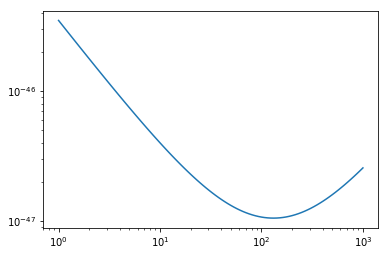

In [12]:
m = np.logspace(0, 3, 100)

plt.figure()
plt.loglog(m, sigma_px(m))
plt.show()
